In [1]:
from src.configs.config import get_cfg
from src.models.build_model import build_model
import tome
import numpy as np
import torch
from train import get_loaders
import src.utils.logging as logging


/home/chuizhao/.conda/envs/prompt/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def first(iteration):
    for i in iteration:
        return i

In [3]:
model_root='/gpfs/accounts/eecs598s010w23_class_root/eecs598s010w23_class/shared_data/yourenz_group/pretrained/'
cfg_file = './configs/prompt/cub.yaml'
cfg = get_cfg()
cfg.merge_from_file(cfg_file)
cfg.MODEL.MODEL_ROOT = model_root
cfg.DATA.FEATURE = 'sup_vitb16_imagenet21k'
cfg.NUM_GPUS = 0
cfg.SEED = 42
cfg.MODEL.PROMPT.NUM_TOKENS = 100
model_vpt, cur_device = build_model(cfg)

In [4]:
ckpt_path = './exps/CUB/sup_vitb16_imagenet21k/lr0.1_wd0.01/run1/important.pth'
model_vpt.load_state_dict(torch.load(ckpt_path, map_location='cpu')['model'])

<All keys matched successfully>

In [5]:
data_path='/gpfs/accounts/eecs598s010w23_class_root/eecs598s010w23_class/shared_data/yourenz_group/datasets/cub'
cfg.DATA.DATAPATH = data_path

In [6]:
logger = logging.get_logger("visual_prompt")
train_loader, val_loader, test_loader = get_loaders(cfg, logger)

In [7]:
batch = first(test_loader)
images = batch['image']
img_list = []
for img in images:
    img_list.append(img[None, ...])

In [ ]:
tome.patch.timm(model_vpt, trace_source=True)
model_vpt.r = 13
pred = model_vpt(img_list[0])
print(model_vpt._tome_info["source"].shape)

In [35]:
from PIL import Image
from IPython.display import display
def tensor_to_image(tensor):
    tensor = tensor[0]
    tensor = tensor.permute(1, 2, 0)
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    return Image.fromarray(tensor)

In [43]:
print(img_list[0].mean())
img = tensor_to_image(img_list[2])

tensor(0.2333)


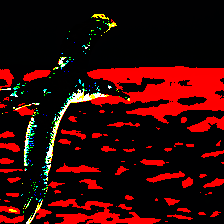

In [37]:
display(img)